In [27]:
import numpy as np
import matplotlib.pyplot as plt

# RK - 4 method for 2nd Order ODE

In [13]:
def rk4_coupled_oscillator(f, y1_0, y2_0, t0, tf, h):
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    y_points = np.zeros((n_steps, 2))
    y_points[0] = [y1_0, y2_0]

    y1, y2 = y1_0, y2_0

    for i in range(n_steps - 1):
        t = t_points[i]

        # Calculate k and l coefficients for y1 and y2 respectively
        k1 = h * y2
        l1 = h * f(t, y1, y2)

        k2 = h * (y2 + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y1 + 0.5 * k1, y2 + 0.5 * l1)

        k3 = h * (y2 + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y1 + 0.5 * k2, y2 + 0.5 * l2)

        k4 = h * (y2 + l3)
        l4 = h * f(t + h, y1 + k3, y2 + l3)

        # Update y1 and y2
        y1 = y1 + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y2 = y2 + (l1 + 2*l2 + 2*l3 + l4) / 6.0

        y_points[i+1] = [y1, y2]

    return t_points, y_points

### Q.1 Solving using RK4 and finding y(3) and v(3)

In [65]:
# Function definition
import math
def f(t,y1,v):
    return -2*0.1*v - ((2*math.pi)**2)*y1   

In [66]:
t_points, y_points = rk4_coupled_oscillator(f, 1, 0, 0, 3, 1e-4)

In [67]:
y = y_points[-1][0] # This gives us y(3)
v = y_points[-1][1] # gives us v(3)
y,v

(0.7407879562975941, 0.011114374276124734)

### Q.2 solution for all values of h $\in$ [0.03,0.3]. Get error for eacch result comparing with y(3) above

In [73]:
preds = []
error_vals = []
y_vals = []
v_vals = []
h_vals = np.arange(0.03, 0.3, 0.027)
for h in h_vals:
    t_points, y_points = rk4_coupled_oscillator(f, 1, 0, 0, 3, h)
    y_vals.append(y_points[-1][0])
    v_vals.append(y_points[-1][1])
    error_vals.append(np.abs(y_points[-1][0] - y))
    preds.append(y_points[-1][0])

Note : Here  RK4 is 4th order hence error $\propto$ $h^4$. 
$$
log(Error) = 4log(h) + C
$$

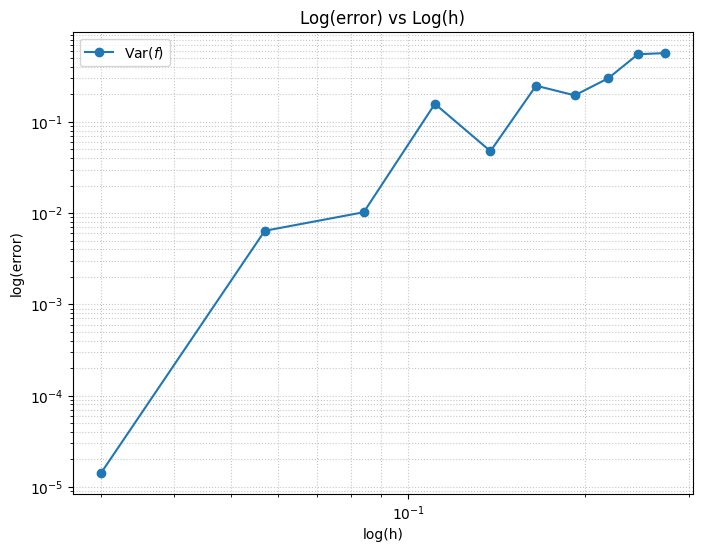

In [74]:
# 4. Plotting
plt.figure(figsize=(8, 6))

# SWAPPED: h_vals is now the first argument (x-axis), error_vals is the second (y-axis)
plt.loglog(h_vals, error_vals, 'o-', label=r'Var($f$)')

# 5. Formatting (Swapped labels)
plt.xlabel(r'log(h)')       # x-axis label
plt.ylabel(r'log(error)')   # y-axis label
plt.title('Log(error) vs Log(h)')
plt.grid(True, which="both", linestyle=':', alpha=0.7)
plt.legend()

plt.show()

In [75]:
slope = (np.log(error_vals[6]) - np.log(error_vals[1])) / (np.log(h_vals[6]) - np.log(h_vals[1]))
slope

2.815662451858048

### Q.3 Plot following data for h = 0.1
- y(t) vs t for t $\propto$ [0,3]
- y(t) vs v(t) for t $\propto$ [0,3]

In [ ]:
t_points , y_points = rk4_coupled_oscillator(f,1,0,0,3,0.1)

In [89]:
y = []
v = []
for i in y_points:
    y.append(i[0])
    v.append(i[1])

Text(0.5, 1.0, 'y(t) vs t')

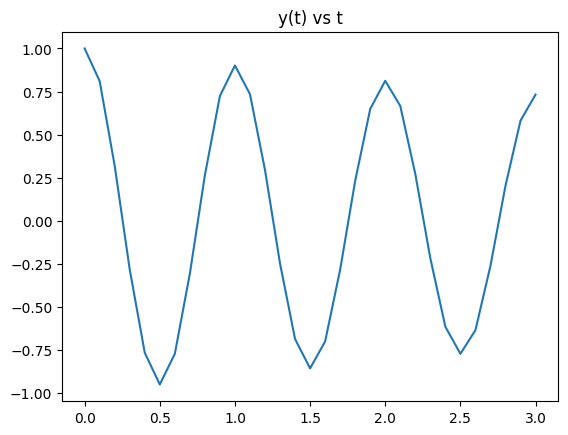

In [92]:
plt.plot(t_points, y)
plt.title("y(t) vs t")

Text(0.5, 1.0, 'v(t) vs t')

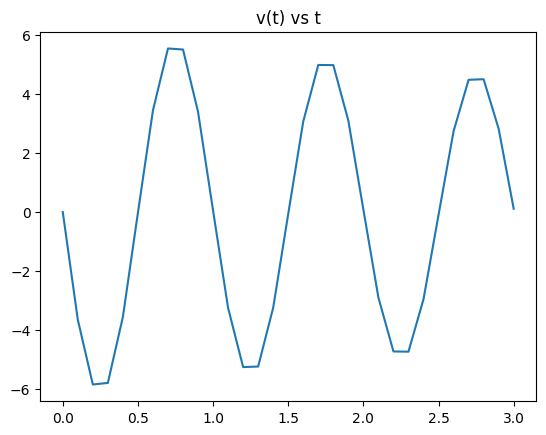

In [94]:
plt.plot(t_points, v)
plt.title("v(t) vs t")